<h1><center>COP27 Global Stocktake Climate Datathon</center></h1>

**Exploratory Data Analysis:**

The dataset provided for the West African Science Service Centre on Climate Change and
Adapted Land Use (WASCAL) prompt contains primary climate data for three different basins in Western Africa. These are the Dano, Dassari and Vea-Sissili Basins. The temporal extent of the data varies for each location, summarised in the table below:

| Location | Data available | Data Missing |
| --- | --- | --- |
| Dano Basin | 2013-2021 | 2016 |
| Dassari Basin | 2015-2021 | 2019 |
| Vea-Sissili Basin | 2012-2021 | - |



**Missing Years**

With the identification of missing years, we set our overall ambition to be the estimation of mean yearly values for each of the location's missing year.

The first step taken to achieve this goal was filling the gaps identified within each dataset.

**Dano Basin**

The 2021 dataset on the Dano Basin contains data from locations across the basin.
As a sample dataset, the Dreyer Foundation data was explored. 


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import NaN


In [24]:
# Read in data
data = pd.read_excel('2021.xlsx')

In [25]:
# Explore and check for duplicates
params  = list(data.columns)[5:]

params

averages = []

def summarise(dataframe, dest):
  # outputs average values for dataframe columns to destination dest

  # ensure destination for list of averages is a list
  if type(dest) != list:
    raise Exception('destination must be list!')
 
  #empty list for null values
  nans = []

  # browse through parameters using dataframe column names
  params  = list(data.columns)[5:]
  for i in range(len(params)):
    var = params[i]
    dat = list(data[var])
    #print(dat)
    if i > -1:
      inds = [i for i, value in enumerate(dat) if value == 0]
      nans.append(inds)
      dat = [x for x in dat if x != 0]
    avg = np.nanmean(dat)
    values = (var, avg)
    print(values)
    dest.append(values)

  dfNans = pd.DataFrame(nans).T
  dfNans.columns = params
  display(dfNans)
  return dfNans

df1 = summarise(data, averages)

('Rain_01_mm', 0.8483614247269116)
('Rain_02_mm', 0.8277832024630541)
('Air_Temp_Deg_C', 28.865296010388327)
('Rel_H_%', 53.056108620788066)
('Solar_R_W/m^2', 233.40796918227403)
('Wind_Sp_m/sec', 1.4062672158101541)
('Wind_Dir_Deg', 353.238784087369)


,Rain_01_mm,Rain_02_mm,Air_Temp_Deg_C,Rel_H_%,Solar_R_W/m^2,Wind_Sp_m/sec,Wind_Dir_Deg
0,0.0,0.0,NaN,NaN,9.0,0.0,0.0
1,1.0,1.0,NaN,NaN,120.0,1.0,1.0
2,2.0,2.0,NaN,NaN,127.0,2.0,2.0
3,3.0,3.0,NaN,NaN,137.0,3.0,3.0
4,4.0,4.0,NaN,NaN,156.0,4.0,4.0
...,...,...,...,...,...,...,...
51547,52554.0,NaN,NaN,NaN,NaN,NaN,NaN
51548,52555.0,NaN,NaN,NaN,NaN,NaN,NaN
51549,52556.0,NaN,NaN,NaN,NaN,NaN,NaN
51550,52557.0,NaN,NaN,NaN,NaN,NaN,NaN


**Generating summary statistics for each of the parameters:**

In [26]:
for i in params:
    print(data[i].describe())

count    52559.000000
mean         0.016254
std          0.278828
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.200000
Name: Rain_01_mm, dtype: float64
count    52559.000000
mean         0.015986
std          0.270896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.100000
Name: Rain_02_mm, dtype: float64
count    52559.000000
mean        28.865296
std          6.657584
min         17.778000
25%         24.696595
50%         27.980020
75%         32.603190
max       1009.360000
Name: Air_Temp_Deg_C, dtype: float64
count    52559.000000
mean        53.056109
std         31.546977
min          4.136000
25%         21.234000
50%         54.056000
75%         82.432000
max         99.998000
Name: Rel_H_%, dtype: float64
count    52559.000000
mean       224.104335
std        306.116590
min          0.000000
25%          0.019078
50%          3.317691
75%        447.214850
max      

**Examining the air temperature data:**

In [27]:
# Summary statistics for the temperature data
data['Air_Temp_Deg_C'].describe()

count    52559.000000
mean        28.865296
std          6.657584
min         17.778000
25%         24.696595
50%         27.980020
75%         32.603190
max       1009.360000
Name: Air_Temp_Deg_C, dtype: float64

The existence of a temperature reading of 1009 Degrees C indicate that invalid measurements of temperature exist within the dataset. These will need to be excluded from any regression/interpolation which follows, as they will have a significant impact on any created models.

To explore the pattern of temperatures across the year, the temperature at noon each day was isolated from the dataset.

In [28]:
# Data for noon each day
interval_df = data[71::144]

In [29]:
# Isolating the temperature data for noon each day
interval_df['Air_Temp_Deg_C']

71       36.18528
215      37.03523
359      36.45987
503      36.54975
647      35.19200
           ...   
51911    32.45955
52055    32.27448
52199    33.61762
52343    32.96750
52487    33.56270
Name: Air_Temp_Deg_C, Length: 365, dtype: float64

Text(0, 0.5, 'Air temperature / Degrees Celcius')

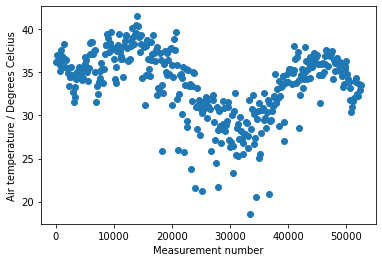

In [30]:
%matplotlib inline
plt.scatter(interval_df.index ,interval_df['Air_Temp_Deg_C'])
plt.xlabel("Measurement number")
plt.ylabel("Air temperature / Degrees Celcius")


The plot of air temperature against day appeared to show some sort of polynomial pattern. Perhaps indicating seasonal variation in temperature, with two warm seasons sandwhiching a cold season in which temperatures drop by approximately 10 degrees.

**Data Gap Filling with Linear Regression models:**

In light of the apparent polynomial pattern, our first attempt at this involved the use of a polynomial regression, using Numpy's in-built functionality.

Attempting regression to generate a general model for the data:

In [31]:
mymodel = np.poly1d(np.polyfit(interval_df.index ,interval_df['Air_Temp_Deg_C'], 3))

In [32]:
myline = np.linspace(1, 53000, 100)

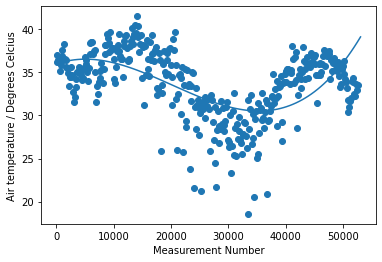

In [33]:
plt.scatter(interval_df.index ,interval_df['Air_Temp_Deg_C'])
plt.plot(myline, mymodel(myline))
plt.xlabel("Measurement Number")
plt.ylabel("Air temperature / Degrees Celcius")
plt.show()

Assessing the fit of the model:

In [34]:
from sklearn.metrics import r2_score

In [35]:
print(r2_score(interval_df['Air_Temp_Deg_C'], mymodel(interval_df.index)))

0.3333070247415243


The polynomial model calculated by NumPy yields a poor fit, shown by the above plot in which the curve does not represent the high variability of the data. Furthermore, the low R^2 value of approximately 0.33 indicates that only 33% of the variability in the data is explained by this model. This would therefore be a poor way to interpolate the data. 

**Interpolation**

Acknowledging that the data is most likely too variable for a regression model to capture its intricacies adequately, we moved to a less general approach. Here, we calculate a rolling mean/moving average of the data.

**Data Gap Filling with Rolling Averages:**

A rolling average function was then instead used to fill the data, written to incorporate a customisable time step, which was defaulted to five days.
As some of the data contained outliers, a cleaning funciton which removed values more than three standard deviations from the mean, replacing them with null values, was applied to the data in order to prevent affecting the rolling average. This can also be used in subsequent data analysis steps to remove outliers. 

In [36]:
 def clean(series):
        #removal of outliers
        UT = series.mean() + 3*series.std()
        LT = series.mean() - 3*series.std()
        cleandata = []
        for val in series:
            if LT <= val <= UT:
                cleandata.append(float(val))
            else:
                cleandata.append(None)
        return(cleandata)
    
def rolling_mean(df, series_name, time_step=5, plot=True):
# obtains (and plots) rolling mean for given series in dataset for given time step, plotting if specified

    dat = df # defining new dataframe for analysis
    dat['data'] = df[series_name] #use given series name for data calculation, defining new column 
    dat['data'] = clean(dat.data) 
    
    #normalises data in rolling interval based on time_step
    dat['z_data'] =  (dat.data - dat.data.rolling(window=time_step).mean()) / dat.data.rolling(window=time_step).std()
    
    # new colimn, with standardized data, offset by time-step
    dat['zp_data'] = dat['z_data'] - dat['z_data'].shift(time_step)
    dat['rolmean'] = dat.data.rolling(window=time_step).mean()
    
    # function for plotting data
    def plot_rolling(df, series_name, time_step):
        df['data'] = df[series_name]

        plt.plot(figsize=(12, 10))
        
        # plots raw data vs rolling mean and standard deviation
        plt.plot(df.index, df.data, label='raw data')
        plt.plot(df.data.rolling(window=time_step).mean(), label="rolling mean");
        plt.plot(df.data.rolling(window=time_step).std(), label="rolling std (x10)");
        plt.legend()
        plt.title(series_name)

        plt.tight_layout()
        plt.show()

    if plot is True: #plots data, if specified
        plot_rolling(dat, series_name, time_step)
    
    return(dat['rolmean']) # returns dataframe with rolling mean and offset data

*Testing the rolling mean model on air temperature data*

In [37]:
data['Air_Temp_Deg_C'].describe()

count    52559.000000
mean        28.865296
std          6.657584
min         17.778000
25%         24.696595
50%         27.980020
75%         32.603190
max       1009.360000
Name: Air_Temp_Deg_C, dtype: float64

C:\Users\GRAHAM~1\AppData\Local\Temp/ipykernel_30412/3792877380.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['data'] = df[series_name] #use given series name for data calculation, defining new column
C:\Users\GRAHAM~1\AppData\Local\Temp/ipykernel_30412/3792877380.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['data'] = clean(dat.data)
C:\Users\GRAHAM~1\AppData\Local\Temp/ipykernel_30412/3792877380.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

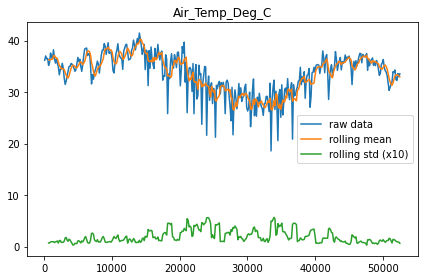

In [38]:
AT_modelvals = rolling_mean(interval_df,'Air_Temp_Deg_C', time_step = 5, plot=True)

The plot above shows that the rolling mean fits the data very well accross the board. We therefore proceed to replace missing data points with the current rolling average value. In the de-trended set, we can see gaps in the rolling de-trended mean which match the gaps in the dataset. 
The next step was to take the cleaned data and use it to identify outliers or null values in the set, and replacing these with the model values, to be compared to the original dataset.The two sets were then plotted below.

In [39]:
#finding indices of outlier values and replacing with model values 
clean_air = clean(interval_df['Air_Temp_Deg_C'])
indices  = [index for (index, item) in enumerate(clean_air) if item is None]

complete_air = list(interval_df['Air_Temp_Deg_C'])
for index in indices: 
    complete_air[index] = list(AT_modelvals)[index] 

The next step is then to apply this procedure to each of the columns in the dataset which contain missing values. The code above can also be run using the indices for null values coming out of the "summarise" function. 

Due to illness and time constraints we were unable to complete the analysis for all stations in the dataset, but this preliminary exploration has shown that a simple model built from scratch can be used to fill gaps in daily noontime measurements for different meteorological parameters. The time_step parameter can be adjusted to fit different scales and granularities of data, and the choice to use functional progamming means this can relatively easily be integrated into more wide-ranging data analysis scripts, or looped through all the stations in the WASCAL dataset. 